In [2]:
!pip install cufflinks 

     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.7 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.7 kB ? eta -:--:--
     -------------- ----------------------- 30.7/81.7 kB 217.9 kB/s eta 0:00:01
     ---------------------------- --------- 61.4/81.7 kB 328.2 kB/s eta 0:00:01
     -------------------------------------- 81.7/81.7 kB 415.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=2c161e34917197a62e97f9a8a0002e5afdcb94d1293f210e244f210392f036aa
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\c3\bf\8f\afa0730b29e347e8c1071049f89748c1262e7a14a838820ae6
Successfully built cufflinks


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#plotly
!pip install chart_studio
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

#datetime
from datetime import datetime



The objective of this notebook is to explore the given NIFTY-50 data and along with the sectoral indices and visualise them to obtain important information.However, if you want to understand the nuances of Time Series data and how to get started with it, there is another notebook which caters to that.

### [Getting started with Time Series using Pandas](https://www.kaggle.com/parulpandey/getting-started-with-time-series-using-pandas)
<hr>

# What is NIFTY 50

![](https://imgur.com/fEgI9b6.png)


The NIFTY 50 index is [National Stock Exchange of India's](https://en.wikipedia.org/wiki/National_Stock_Exchange_of_India) benchmark broad based stock market index for the Indian equity market. NIFTY 50 stands for National Index Fifty, and represents the weighted average of 50 Indian company stocks in 17 sectors. It is one of the two main stock indices used in India, the other being the [BSE Sensex](https://en.wikipedia.org/wiki/BSE_SENSEX).
[Source:Wikipedia](https://en.wikipedia.org/wiki/NIFTY_50)


# Dataset
![](https://i2.wp.com/stableinvestor.com/wp-content/uploads/2019/09/Nifty-Indexes-Broad-Markets.png?w=630&ssl=1)
*source:https://stableinvestor.com/2019/09/explained-nifty-indices-nifty50.html*

The dataset consists of 13 files.Let's quickly understand what those are:

### INDIAVIX 

India VIX is a volatility index based on the NIFTY Index Option prices.Volatility Index is a measure of market’s expectation of volatility over the near term. Volatility is often described as the “rate and magnitude of changes in prices" and in finance often referred to as risk. Volatility Index is a measure, of the amount by which an underlying Index is expected to fluctuate, in the near term,[Source](https://www1.nseindia.com/products/content/equities/indices/india_vix.htm)

### NIFTY 50, NIFTY 100 and NIFTY 500 
  * NIFTY 500 - It represents the top 500 companies based on full market capitalisation from the eligible universe
  * NIFTY 100 - This represents the top 100 companies (i.e. from 1 to 100) from within the NIFTY 500. This index basically tries to track the performance of companies having large market caps.
  * NIFTY 50 - This represents the first 50 companies from the NIFTY 100.

### NIFTY SMALL CAP & MID CAP
* NIFTY SMALLCAP - This index measures the performance of small-cap companies.
* NIFTY MIDCAP - This index tries to measure the performance of mid-cap companies.

### NIFTY NEXT 50
This includes the remaining 50 companies from NIFTY 100 after excluding the NIFTY 50 companies. These are also called as NIFTY Junior.

### NIFTY SECTORAL INDICES
This includes NIFTY AUTO,NIFTY BANK, NIFTY FMCG, NIFTY IT,NIFTY METAL, NIFTY PHARMA
These Indices are designed to reflect the behavior and performance of the segment that they reflect i.e automobiles, bank, pharma etc.





# 1. A first look at NIFTY 50 data

In [4]:
nifty_50 = pd.read_csv('E:/git hub projects/Nifty/NIFTY 50.csv',parse_dates=["Date"])
nifty_50.head()

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
0,2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322.0,8.841500e+09,25.91,4.63,0.95
1,2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872.0,1.973690e+10,26.67,4.76,0.92
2,2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431.0,3.084790e+10,25.97,4.64,0.95
3,2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875.0,2.531180e+10,26.32,4.70,0.94
4,2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945.0,1.914630e+10,26.25,4.69,0.94


In [3]:
nifty_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5061 entries, 0 to 5060
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5061 non-null   datetime64[ns]
 1   Open       5061 non-null   float64       
 2   High       5061 non-null   float64       
 3   Low        5061 non-null   float64       
 4   Close      5061 non-null   float64       
 5   Volume     5060 non-null   float64       
 6   Turnover   5060 non-null   float64       
 7   P/E        5061 non-null   float64       
 8   P/B        5061 non-null   float64       
 9   Div Yield  5061 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 395.5 KB


## 1.1 About the Stock Data

Now that our data has been converted into the desired format, let’s take a look at its various columns for further analysis.

* **The Open and Close columns** indicate the opening and closing price of the stocks on a particular day.
* **The High and Low columns** provide the highest and the lowest price for the stock on a particular day, respectively.
* **The Volume column** tells us the total volume of stocks traded on a particular day.
* **The Turnover column** [refers](https://bizfluent.com/info-12155995-turnover-trading.html) to the total value of stocks traded during a specific period of time. The time period may be annually, quarterly, monthly or daily
* **P/E** also called as the price-earnings ratio relates a company's share price to its earnings per share.
* **P/B** also called as Price-To-Book ratio measures the market's valuation of a company relative to its book value.
* **Div Yield** or the dividend yield is the amount of money a company pays shareholders (over the course of a year) for owning a share of its stock divided by its current stock price—displayed as a percentage.  

*Source: [Investopedia.com](https://www.investopedia.com/)*

## 1.2 Missing values 

In [5]:
nifty_50.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       1
Turnover     1
P/E          0
P/B          0
Div Yield    0
dtype: int64

There is just one missing value in two columns. Let's fill those.

In [6]:
nifty_50.fillna(method='ffill',inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_36812\2071397665.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



## 1.3 Visualising the NIFTY 50 data

C:\Users\DELL\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



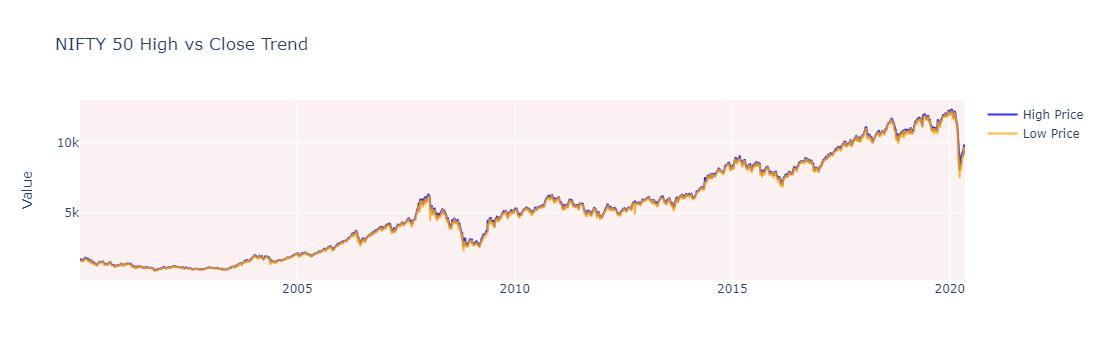

In [7]:
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=nifty_50['Date'],
         y=nifty_50['High'],
         name='High Price',
    line=dict(color='blue'),
    opacity=0.8))

fig.add_trace(go.Scatter(
         x=nifty_50['Date'],
         y=nifty_50['Low'],
         name='Low Price',
    line=dict(color='orange'),
    opacity=0.8))
        
    
fig.update_layout(title_text='NIFTY 50 High vs Close Trend',plot_bgcolor='rgb(250, 242, 242)',yaxis_title='Value')

fig.show()

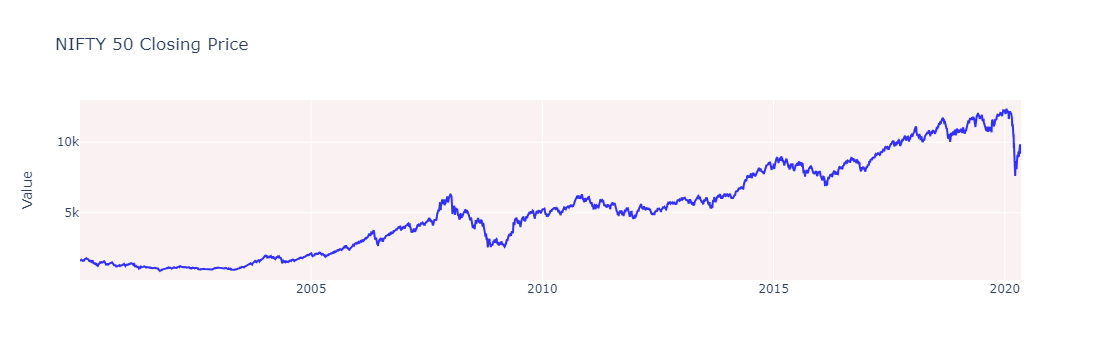

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=nifty_50['Date'],
         y=nifty_50['Close'],
         name='Closing Price',
    line=dict(color='blue'),
    opacity=0.8))

    
fig.update_layout(title_text='NIFTY 50 Closing Price',plot_bgcolor='rgb(250, 242, 242)',yaxis_title='Value')

fig.show()

## 1.4 P/E vs P/B Ratio : Which one to use?

[P/E ratio is a popular measure](https://towardsdatascience.com/visualizing-the-stock-market-with-tableau-c0a7288e7b4d) of how expensive a company’s stock is. It is simply the company’s market capitalization divided by its net income — in other words, how much does it cost us to buy $1 of a particular company’s earnings. The higher the P/E ratio, all other things equal, the more expensive a stock is perceived to be.the P/E ratio shows what the market is willing to pay today for a stock based on its past or future earnings. A high P/E could mean that a stock's price is high relative to earnings and possibly overvalued. Conversely, a low P/E might indicate that the current stock price is low relative to earnings. 

![](https://imgur.com/mNCjWPD.png)

The **P/B ratio** on the other hand measures the market's valuation of a company relative to its book value.P/B ratio is used by value investors to identify potential investments and P/B ratios under 1 are typically considered solid investments.

![](https://imgur.com/uFGqIRV.png)

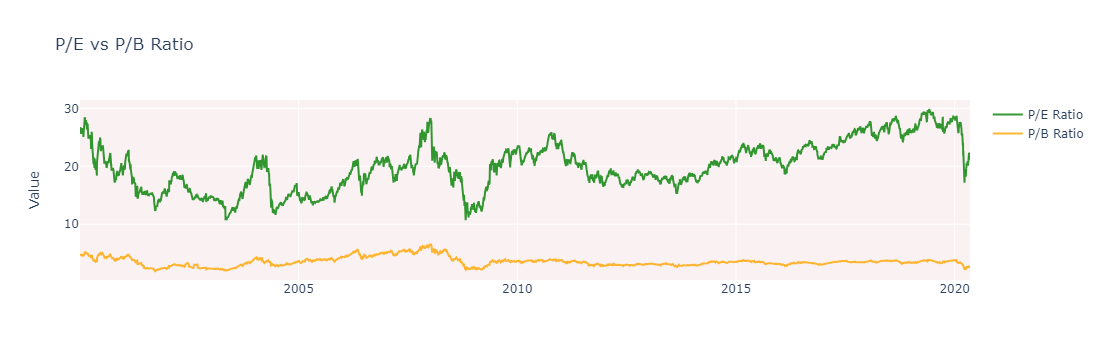

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=nifty_50['Date'],
         y=nifty_50['P/E'],
         name='P/E Ratio',
    line=dict(color='green'),
    opacity=0.8))

fig.add_trace(go.Scatter(
         x=nifty_50['Date'],
         y=nifty_50['P/B'],
         name='P/B Ratio',
    line=dict(color='orange'),
    opacity=0.8))
        
    
fig.update_layout(title_text='P/E vs P/B Ratio',plot_bgcolor='rgb(250, 242, 242)',yaxis_title='Value')

fig.show()

Whether PE is better or PB depends on the industry in question. Sometimes you need to take both into account to get an accurate picture of a company’s health and its financial prospects.YOu can read more about it here:[PE versus PB ratio: Which one to use to assess a company’s health](https://www.livemint.com/money/personal-finance/pe-versus-pb-ratio-which-one-to-use-to-assess-a-company-s-health-1568132592441.html)

# 2. Looking at market performance 2019 onwards

In [10]:
nifty_50_2019 = nifty_50[nifty_50['Date'] >= '2019-01-01']
nifty_50_2019.head()

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
4729,2019-01-01,10881.70,10923.60,10807.10,10910.10,159404542.0,8.688260e+10,26.28,3.40,1.24
4730,2019-01-02,10868.85,10895.35,10735.05,10792.50,309665939.0,1.535225e+11,26.00,3.36,1.25
4731,2019-01-03,10796.80,10814.05,10661.25,10672.25,286241745.0,1.503045e+11,25.71,3.32,1.26
4732,2019-01-04,10699.70,10741.05,10628.65,10727.35,296596655.0,1.451674e+11,25.84,3.34,1.26
4733,2019-01-07,10804.85,10835.95,10750.15,10771.80,269371080.0,1.273129e+11,25.95,3.36,1.25


C:\Users\DELL\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



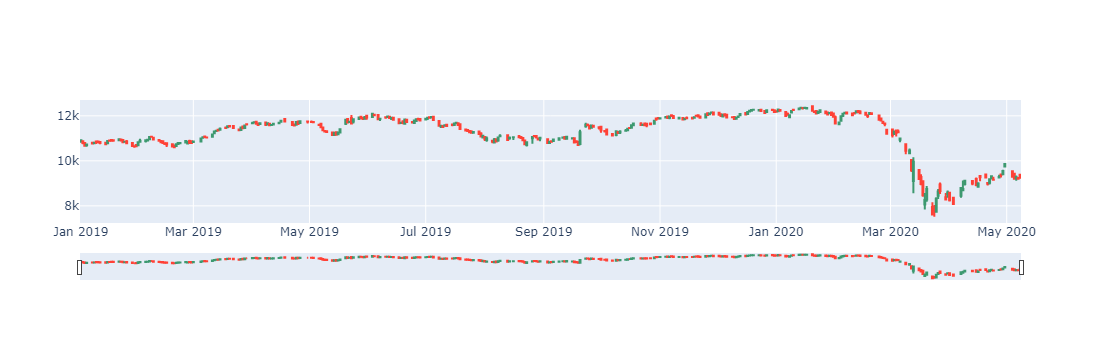

In [11]:
df=nifty_50_2019
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

## 2.1 NIFTY_50 : Major single day falls -2019 onwards

C:\Users\DELL\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



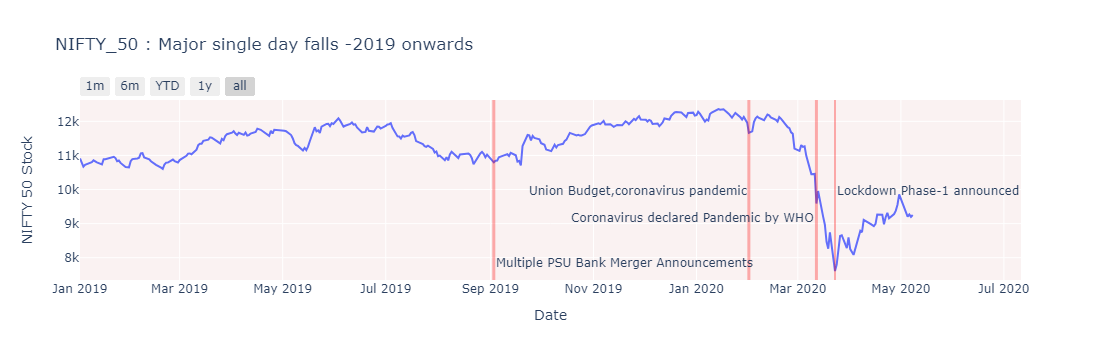

In [12]:
fig = px.line(nifty_50_2019, x='Date', y='Close', title='Time Series with Range Slider and Selectors')

fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)',
    title='NIFTY_50 : Major single day falls -2019 onwards',
    yaxis_title='NIFTY 50 Stock',
    shapes = [dict(x0='2020-03-23', x1='2020-03-23', y0=0, y1=1, xref='x', yref='paper', line_width=2,opacity=0.3,line_color='red',editable=False),
             dict(x0='2019-09-3', x1='2019-09-3', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='red'),
             dict(x0='2020-02-1', x1='2020-02-1', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='red'),
             dict(x0='2020-03-12', x1='2020-03-12', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='red')],
    annotations=[dict(x='2020-03-23', y=0.5, xref='x', yref='paper',
                    showarrow=False, xanchor='left', text='Lockdown Phase-1 announced'),
                dict(x='2019-09-3', y=0.05, xref='x', yref='paper',
                    showarrow=False, xanchor='left', text='Multiple PSU Bank Merger Announcements'),
                dict(x='2020-02-1', y=0.5, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='Union Budget,coronavirus pandemic'),
                dict(x='2020-03-12', y=0.3, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='Coronavirus declared Pandemic by WHO')]
)
fig.show()

Year 2020 saw a massive fall in the NIFTY 50 index which is prominent in the graph above. The effect can be seen majorly when the first phase of the lockdown started.

## 2.2 NIFTY_50 : Major single day gains -2019 onwards

C:\Users\DELL\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



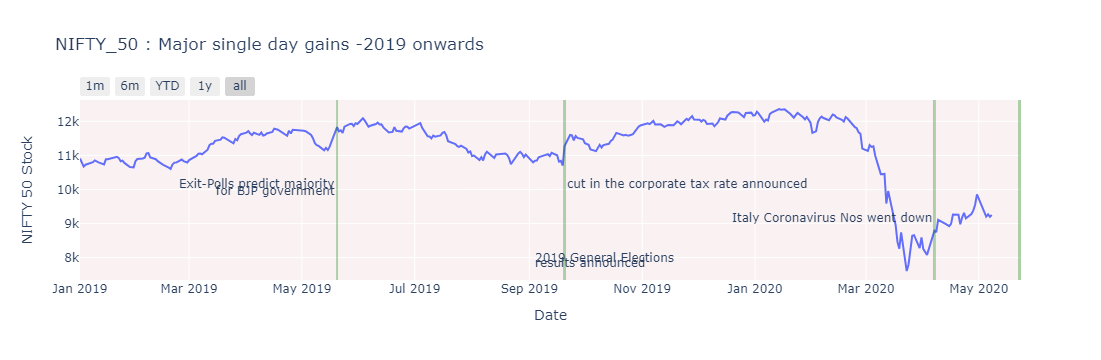

In [13]:
fig = px.line(nifty_50_2019, x='Date', y='Close', title='Time Series with Range Slider and Selectors')

fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)',
    title='NIFTY_50 : Major single day gains -2019 onwards',
    yaxis_title='NIFTY 50 Stock',
    shapes = [dict(x0='2019-05-20', x1='2019-05-20', y0=0, y1=1, xref='x', yref='paper', line_width=2,opacity=0.3,line_color='green',editable=False),
             dict(x0='2020-05-23', x1='2020-05-23', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='green'),
             dict(x0='2019-09-20', x1='2019-09-20', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='green'),
             dict(x0='2020-04-07', x1='2020-04-07', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='green')],
    annotations=[dict(x='2019-05-20', y=0.54, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='Exit-Polls predict majority'),
                 dict(x='2019-05-20', y=0.5, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='for BJP government'),
                dict(x='2019-09-3', y=0.08, xref='x', yref='paper',
                    showarrow=False, xanchor='left', text='2019 General Elections'),
                 dict(x='2019-09-3', y=0.05, xref='x', yref='paper',
                    showarrow=False, xanchor='left', text='results announced'),
                dict(x='2019-09-20', y=0.54, xref='x', yref='paper',
                    showarrow=False, xanchor='left', text='cut in the corporate tax rate announced'),
                dict(x='2020-04-07', y=0.3, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='Italy Coronavirus Nos went down')]
)
fig.show()

Due to reduction in the number of the Coronavirus cases in India, a positive sentiment was generated which translated to gain in the NIFTY index.

# 3. Performance of other Nifty Sectoral Indices in 2020

Let us now see the performance of NIFTY's sectoral indices which have been provided in the data. It'll be interesting to see how they have fared in these times of turmoil.

In [15]:
nifty_auto = pd.read_csv('E:/git hub projects/Nifty/NIFTY AUTO.csv',parse_dates=["Date"])
nifty_bank = pd.read_csv('E:/git hub projects/Nifty/NIFTY BANK.csv',parse_dates=["Date"])
nifty_fmcg = pd.read_csv('E:/git hub projects/Nifty/NIFTY FMCG.csv',parse_dates=["Date"])
nifty_IT = pd.read_csv('E:/git hub projects/Nifty/NIFTY IT.csv',parse_dates=["Date"])
nifty_metal = pd.read_csv('E:/git hub projects/Nifty/NIFTY METAL.csv',parse_dates=["Date"])
nifty_pharma = pd.read_csv('E:/git hub projects/Nifty/NIFTY PHARMA.csv',parse_dates=["Date"])


#Fill in missing values
nifty_auto.fillna(method='ffill',inplace=True)
nifty_bank.fillna(method='ffill',inplace=True)
nifty_fmcg.fillna(method='ffill',inplace=True)
nifty_IT.fillna(method='ffill',inplace=True)
nifty_metal.fillna(method='ffill',inplace=True)
nifty_pharma.fillna(method='ffill',inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_36812\3647723632.py:10: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\DELL\AppData\Local\Temp\ipykernel_36812\3647723632.py:11: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\DELL\AppData\Local\Temp\ipykernel_36812\3647723632.py:12: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\DELL\AppData\Local\Temp\ipykernel_36812\3647723632.py:13: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\DELL\AppData\Local\Temp\ipykernel_36812\3647723632.py:14: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() 

Let's quickly understand what each of them represent:

* NIFTy Auto Index

The Nifty Auto Index is designed to reflect the behavior and performance of the Automobiles sector which includes manufacturers of cars & motorcycles, heavy vehicles, auto ancillaries, tyres, etc. 

* NIFTY Bank Index

Nifty Bank Index is an index comprised of the most liquid and large capitalised Indian Banking stocks. It provides investors and market intermediaries with a benchmark that captures the capital market performance of Indian Banks

* NIFTY FMCG Index

The Nifty FMCG Index comprises of maximum of 15 companies who manufacture such FMGC(Fast Moving Consumer Goods) products

* NIFTY IT Index

Companies in this index are those that have more than 50% of their turnover from IT related activities like IT Infrastructure , IT Education and Software Training , Telecommunication Services and Networking Infrastructure, Software Development, Hardware Manufacturer’s, Vending, Support and Maintenance.

* NIFTY Metal Index

The Nifty Metal Index is designed to reflect the behavior and performance of the Metals sector including mining. The Nifty Metal Index comprises of maximum of 15 stocks that are listed on the National Stock Exchange.

* NIFTY Pharma Index


Nifty Pharma Index to capture the performance of the Pharmaceuticals companies in this sector.

## 3.1 Comparing Closing prices of different sectoral indices

In [16]:
nifty_auto_2019 = nifty_auto[nifty_auto['Date'] > '2019-12-31']
nifty_bank_2019 = nifty_bank[nifty_bank['Date'] > '2019-12-31']
nifty_fmcg_2019 = nifty_fmcg[nifty_fmcg['Date'] > '2019-12-31']
nifty_IT_2019 = nifty_IT[nifty_IT['Date'] > '2019-12-31']
nifty_metal_2019 = nifty_metal[nifty_metal['Date'] > '2019-12-31']
nifty_pharma_2019 = nifty_pharma[nifty_pharma['Date'] > '2019-12-31']

d = {'NIFTY Auto index': nifty_auto_2019['Close'].values, 
     'NIFTY Bank index': nifty_bank_2019['Close'].values,
     'NIFTY FMCG index': nifty_fmcg_2019['Close'].values,
     'NIFTY IT index': nifty_IT_2019['Close'].values,
     'NIFTY Metal index': nifty_metal_2019['Close'].values,
     'NIFTY Pharma index': nifty_pharma_2019['Close'].values,
    }



In [17]:

df = pd.DataFrame(data=d)
df.index=nifty_auto_2019['Date']
df.head()

,NIFTY Auto index,NIFTY Bank index,NIFTY FMCG index,NIFTY IT index,NIFTY Metal index,NIFTY Pharma index
Date,,,,,,
2020-01-01,8210.10,32102.90,30234.25,15722.15,2796.05,8047.10
2020-01-02,8267.45,32443.85,30266.20,15709.65,2869.90,8053.95
2020-01-03,8168.15,32069.25,30109.25,15936.60,2848.35,8111.95
2020-01-06,7978.75,31237.15,29799.30,15879.80,2765.75,7987.35
2020-01-07,8002.50,31399.40,29861.80,15895.20,2785.90,8036.50


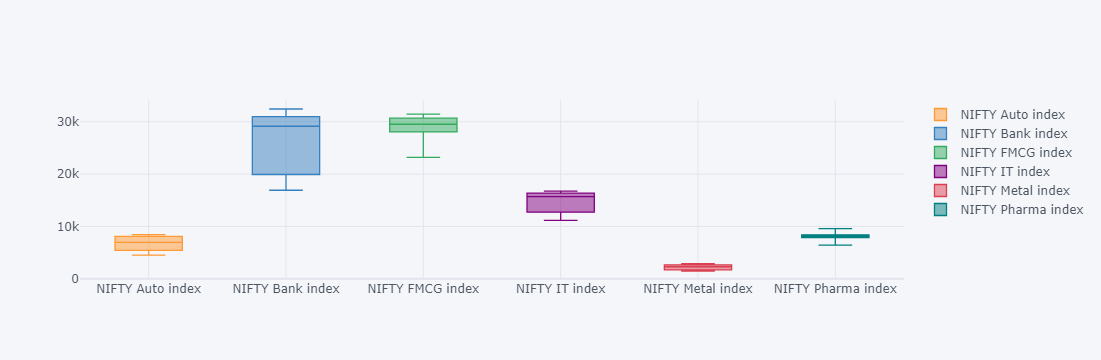

In [18]:
df.iplot(kind='box')

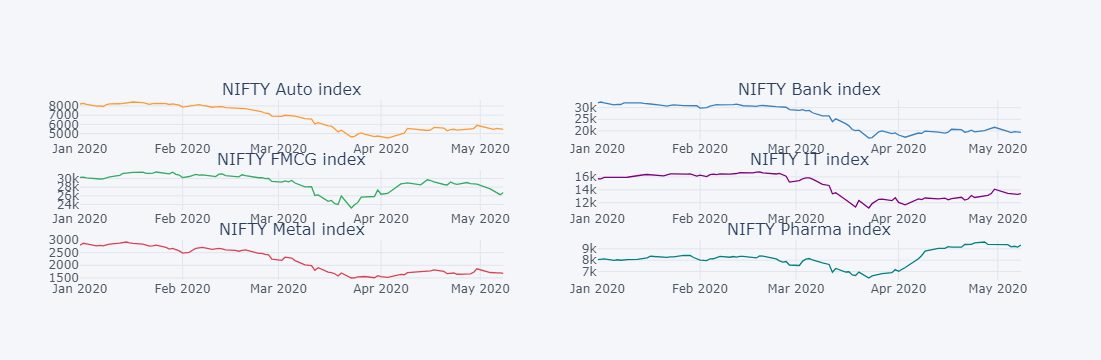

In [19]:
fig = df.iplot(asFigure=True, subplots=True, subplot_titles=True, legend=False)
fig.show()

In 2020, all the sectoral indices were affected but as can be seen above, FMCG abd Pharma sector have started to rebound.

# 4 COVID-19 pandemic Lockdown Effect

On 24 March 2020, the Government of India under Prime Minister Narendra Modi ordered a nationwide lockdown for 21 days, limiting movement of the entire 1.3 billion population of India as a preventive measure against the COVID-19 pandemic in India[[Source]](https://en.wikipedia.org/wiki/COVID-19_pandemic_lockdown_in_India)

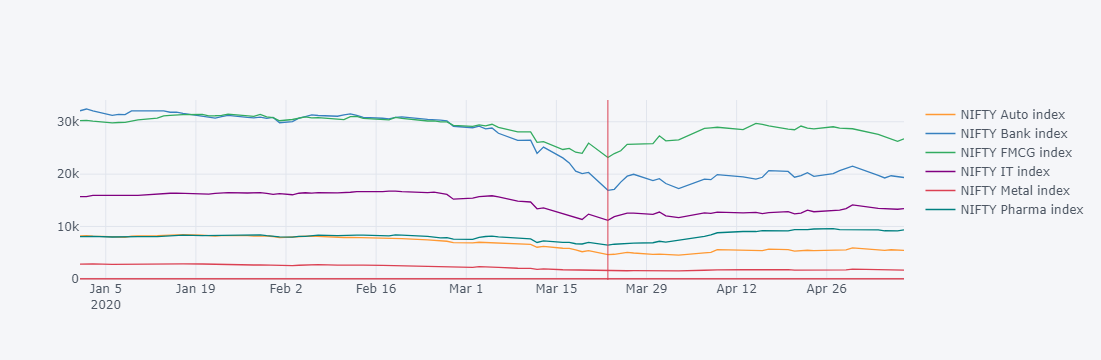

In [20]:
fig = df.iplot(asFigure=True, hline=[2,4], vline=['2020-03-23'])
fig.show()

The red vertical line shows the day of the first phase of Lockdown in India.

## 4.1 Lockdown Phase 1 (25 March – 14 April)

The first phase of Lockdown in India started 

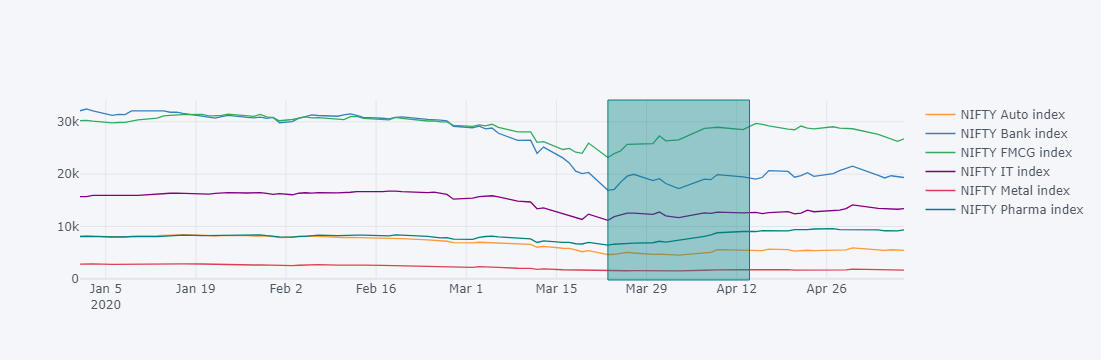

In [21]:
fig = df.iplot(asFigure=True,
               vspan={'x0':'2020-03-23','x1':'2020-04-14',
                      'color':'rgba(30,30,30,0.3)','color':'teal','fill':True,'opacity':.4})

fig.show()

## 4.2 Lockdown Phase 2 (15 April – 3 May)

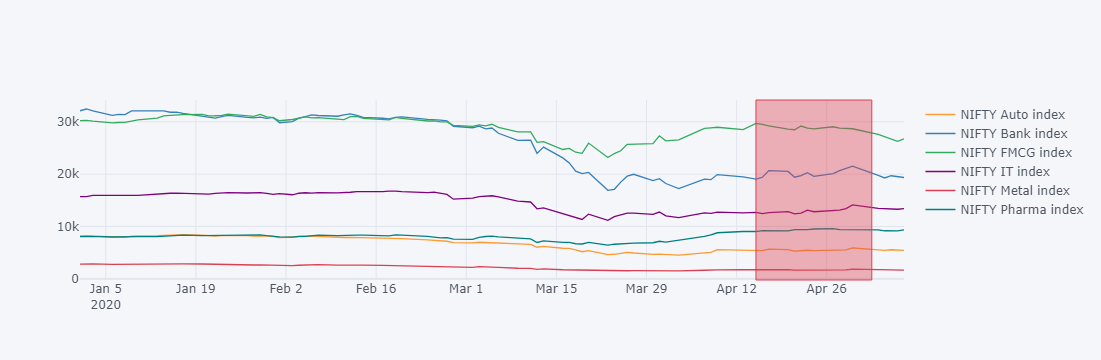

In [22]:
fig = df.iplot(asFigure=True,
               vspan={'x0':'2020-04-15','x1':'2020-05-03',
                      'color':'rgba(30,30,30,0.3)','color':'red','fill':True,'opacity':.4})

fig.show()

# 6 Deep dive into better performing indices in 2020 

## 6.1 Nifty-Pharma Index

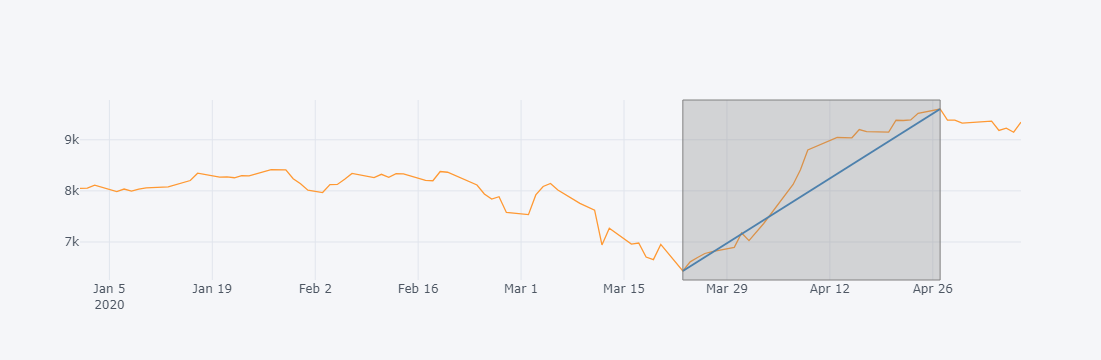

In [23]:
df_a=df['NIFTY Pharma index']
max_val=df_a.max()
min_val=df_a.min()
max_date=df_a[df_a==max_val].index[0].strftime('%Y-%m-%d')
min_date=df_a[df_a==min_val].index[0].strftime('%Y-%m-%d')
shape1=dict(kind='line',x0=max_date,y0=max_val,x1=min_date,y1=min_val,color='blue',width=2)
shape2=dict(kind='rect',x0=max_date,x1=min_date,fill=True,color='gray',opacity=.3)

df_a.iplot(shapes=[shape1,shape2])

The pharma sector seems to be recovering after the intital dip around the first lockdown period